In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
##### Funciones ######

def cost_func(y,y_pred):  # y y y_pred son vectores
    s = np.sum((y-y_pred)**2)
    return s/(2*len(y))        

def up_date(X,y,y_pred,Th, alpha):
    error = y_pred-y
    grad = np.sum(X*error.reshape(-1,1), axis=0)/X.shape[0]
    return Th - alpha*grad

def calc_score(y,y_pred):
    sstot = np.sum((y-np.mean(y))**2)
    ssres = np.sum((y-y_pred)**2)
    return 1-ssres/sstot

### Leer datos ###
dataset = pd.read_csv('datos_RLM.csv', header=None)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Estandarizar datos ###
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_std_0= sc_X.fit_transform(X)

#### Agregar un columna de todo 1 ###
Vec_uno = np.ones((X_std_0.shape[0],1))
X_std =np.concatenate((Vec_uno,X_std_0), axis=1)
X_no_std =np.concatenate((Vec_uno,X), axis=1)   # prueba sin estandarización

In [6]:
X_std[:5]

array([[ 1.        ,  0.13141542, -0.22609337],
       [ 1.        , -0.5096407 , -0.22609337],
       [ 1.        ,  0.5079087 , -0.22609337],
       [ 1.        , -0.74367706, -1.5543919 ],
       [ 1.        ,  1.27107075,  1.10220517]])

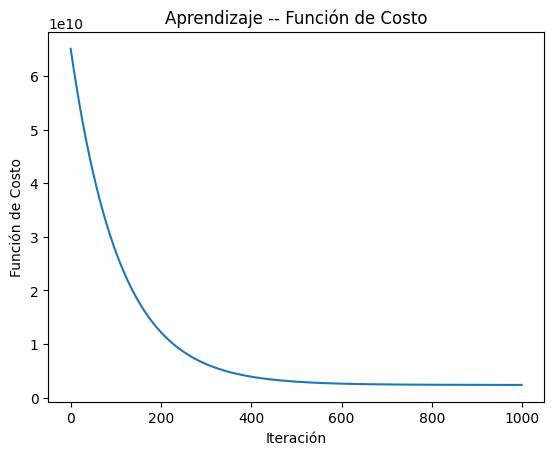

my score = 0.685816431574344
my Intercept =  0.5949285906882845
my Incrinación =  [163.78066084  -0.78138879]
 


In [10]:
#### Inicializar los parametros ####

#Th=np.array([0.1,-0.1,0.1]) # valor inicial -- puede ser aleatoria
Th =np.random.randn(1,3)
alpha = 1.0e-9
num_iter = 1000
cost=[]
for  i in range(num_iter):
    y_pred =np.dot(Th,X_no_std.T)
    cost.append(cost_func(y,y_pred))
    Th = up_date(X_no_std,y,y_pred,Th,alpha) #probar con los datos no estandarizado
   
plt.plot(cost)
plt.title("Aprendizaje -- Función de Costo")
plt.xlabel("Iteración")
plt.ylabel("Función de Costo")
plt.show()  

## Calcular score
my_score = calc_score(y, y_pred)
print("my score = {}".format(my_score))
print("my Intercept = ",Th[0,0])
print("my Incrinación = ",Th[0,1:3])
print(' ')

In [11]:
'''#### Averiguar usando sklearn linear regression ###'''
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X, y)
score = regression.score(X,y)
print("score = {}".format(score))
print("Intercept = ",regression.intercept_)
print("Incrinación = ",regression.coef_)
print(' ')

###### Usar standarización de datos
regression = LinearRegression()
regression.fit(X_std[:,1:], y)
score = regression.score(X_std[:,1:],y)
print("Stand score = {}".format(score))
print("Stand Intercept = ",regression.intercept_)
print("Stand Incrinación = ",regression.coef_)

score = 0.7329450180289142
Intercept =  89597.90954279754
Incrinación =  [  139.21067402 -8738.01911233]
 
Stand score = 0.7329450180289142
Stand Intercept =  340412.6595744681
Stand Incrinación =  [109447.79646964  -6578.35485416]
